In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import Sequential
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint
from keras.layers import Flatten, Dense
from keras.utils import np_utils
from sklearn import metrics
from tensorflow import keras

2024-05-21 01:43:58.348290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 01:43:58.555318: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-21 01:43:58.555345: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-21 01:44:00.369947: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
train_set = pd.read_csv('data/adult/adult.data', sep=", ", header=None, engine='python')
test_set = pd.read_csv('data/adult/adult.test', sep=", ", skiprows=1, header=None, engine='python')

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
              'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [3]:
dataset = pd.concat([train, test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0, '<=50K': 0, '>50K.': 1, '>50K': 1})

dataset.drop(["fnlwgt"], axis=1, inplace=True)
dataset.drop(["education"], axis=1, inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()
d = dict(pd.cut(x[x.index != " United-States"], 5, labels=range(5)))
dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset, drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class", axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class", axis=1)
y_test = test.wage_class

In [4]:
history = History()
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2024-05-21 01:44:05.597965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-21 01:44:05.598017: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-21 01:44:05.598054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kjUbuntu): /proc/driver/nvidia/version does not exist
2024-05-21 01:44:05.598483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [6]:
save_best_model = ModelCheckpoint("models/wagi_best.h5", save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=30,
                    callbacks=[save_best_model])

Epoch 1/30
943/943 [==============================] - 7s 6ms/step - loss: 0.4939 - accuracy: 0.7696 - val_loss: 0.3939 - val_accuracy: 0.8129
Epoch 2/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3884 - accuracy: 0.8095 - val_loss: 0.3802 - val_accuracy: 0.8159
Epoch 3/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3771 - accuracy: 0.8139 - val_loss: 0.3733 - val_accuracy: 0.8016
Epoch 4/30
943/943 [==============================] - 4s 5ms/step - loss: 0.3732 - accuracy: 0.8139 - val_loss: 0.3744 - val_accuracy: 0.8045
Epoch 5/30
943/943 [==============================] - 5s 5ms/step - loss: 0.3673 - accuracy: 0.8161 - val_loss: 0.3724 - val_accuracy: 0.8088
Epoch 6/30
943/943 [==============================] - 5s 5ms/step - loss: 0.3701 - accuracy: 0.8149 - val_loss: 0.3948 - val_accuracy: 0.7926
Epoch 7/30
943/943 [==============================] - 5s 5ms/step - loss: 0.3694 - accuracy: 0.8145 - val_loss: 0.3793 - val_accuracy: 0.8165
Epoch 

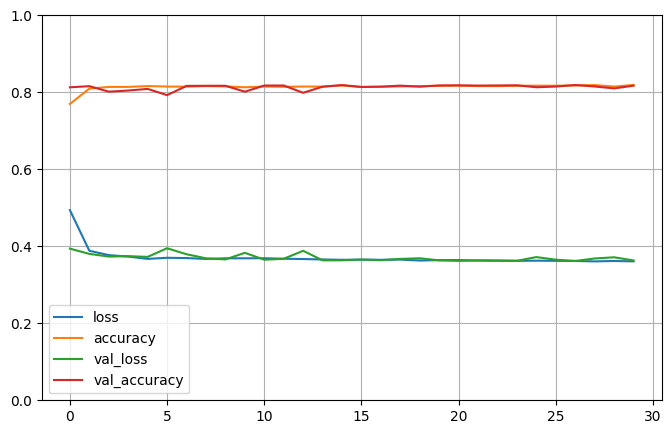

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
model.evaluate(X_test, y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8171


[0.3631944954395294, 0.8171314597129822]

In [9]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

471/471 [==============================] - 1s 2ms/step
0.8171314741035857


# Zad

Wczytaj nauczony model

In [10]:
model_from_file = Sequential()
model_from_file.add(Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)))
model_from_file.add(Dense(50, activation="sigmoid"))
model_from_file.add(Dense(10, activation="sigmoid"))
model_from_file.add(Dense(1, activation="sigmoid"))
model_from_file.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
model_from_file.load_weights("models/wagi_best.h5")
model_from_file.evaluate(X_test, y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.8189


[0.3617599606513977, 0.8189243078231812]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku

In [11]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [13]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)

In [14]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
save_best_model = ModelCheckpoint("models/mnist_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=30,
                    callbacks=[save_best_model])

Epoch 1/30


2024-05-21 01:46:35.853415: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 12s 7ms/step - loss: 0.6130 - accuracy: 0.8375 - val_loss: 0.3159 - val_accuracy: 0.9104
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2889 - accuracy: 0.9163 - val_loss: 0.2483 - val_accuracy: 0.9297
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2348 - accuracy: 0.9318 - val_loss: 0.2111 - val_accuracy: 0.9370
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2005 - accuracy: 0.9426 - val_loss: 0.1800 - val_accuracy: 0.9466
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1744 - accuracy: 0.9494 - val_loss: 0.1614 - val_accuracy: 0.9522
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1543 - accuracy: 0.9554 - val_loss: 0.1470 - val_accuracy: 0.9562
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1379 - accuracy: 0.9607 - val_loss: 0.1386 - val_accuracy: 0.9589


In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9783


[0.07096404582262039, 0.9782999753952026]

Wczytanie modelu

In [18]:
model_from_file = Sequential()
model_from_file.add(Flatten(input_shape=[28, 28]))
model_from_file.add(Dense(300, activation="relu"))
model_from_file.add(Dense(100, activation="relu"))
model_from_file.add(Dense(10, activation="softmax"))
model_from_file.compile(loss="categorical_crossentropy",
                        optimizer="sgd",
                        metrics=["accuracy"])
model_from_file.load_weights("models/mnist_model.h5")
model_from_file.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9788


[0.07041223347187042, 0.9787999987602234]